In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
labels = ["naive", "tree", "map"]
data = pd.concat([pd.read_csv(f"data/tables/table_{label}.csv") for label in labels]).reset_index(drop=True)
data

,n,algorithm,operation,time
0,2,naive,process,1000
1,2,naive,answer,1755200
2,4,naive,process,900
3,4,naive,answer,3152400
4,8,naive,process,800
...,...,...,...,...
91,512,map,answer,13343100
92,1024,map,process,50695178000
93,1024,map,answer,16330400
94,2048,map,process,418081974200


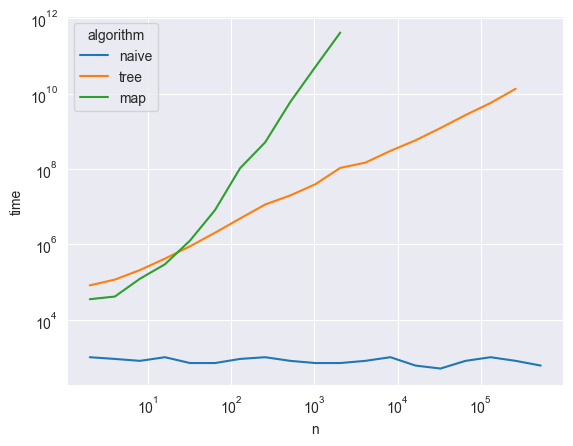

In [14]:
processing = data[data.operation == "process"]
sns.lineplot(data=processing, x='n', y='time', hue="algorithm")
plt.yscale("log")
plt.xscale("log")
plt.show()

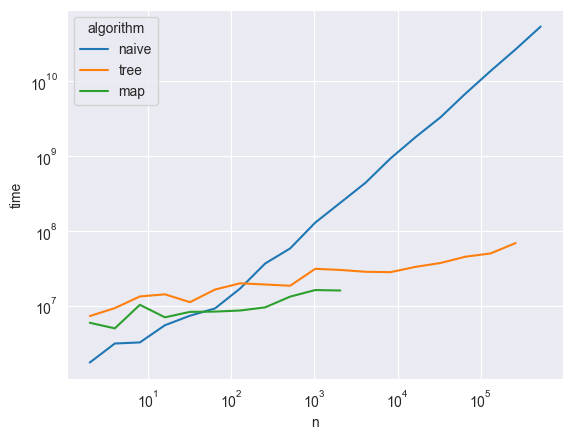

In [15]:
answering = data[data.operation == "answer"]
sns.lineplot(data=answering, x='n', y='time', hue="algorithm")
plt.yscale("log")
plt.xscale("log")
plt.show()

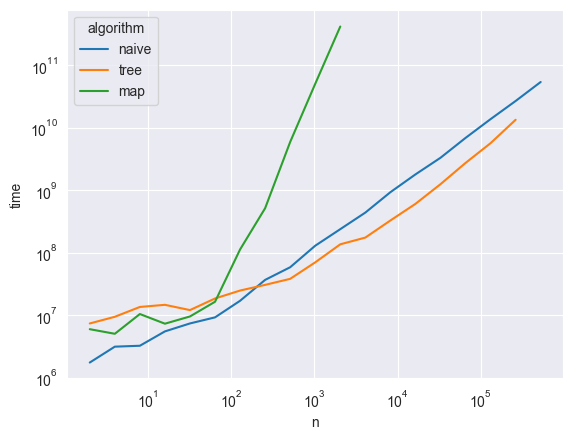

In [17]:
combined = answering.drop(columns=['time'])
combined.operation = 'combined'
combined['time'] = np.array(answering.time) + np.array(processing.time)

sns.lineplot(data=combined, x='n', y='time', hue="algorithm")
plt.yscale("log")
plt.xscale("log")
plt.show()